<a href="https://colab.research.google.com/github/vramius1017/lps-module-data-analyst-ST/blob/master/Classification_Titanic_Ennonce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nettoyage pour Machine Learning : Titanic

Un modèle de machine learning se construit à travers un entrainement sur un jeu de données labélisées (etiquetées), c'est à dire un jeu de données avec résultat.

Le premier objectif est donc d'identifier la variable à prédire puis mettre en forme un maximum de lignes d'observations ainsi que leurs variables (colonnes) pour aider notre modèle à évaluer les corrélations significatives entre ces renseignements.

De cette maniere le modèle interprete les correlations significatives de chaque ligne d'observation (variables) avec son réultat (la colonne labelisée). 

En machine learning classique, le modele évalue ainsi le poids de chacune de ces colonnes (features) sur le resultat global.

Ainsi, le modele se calle pour etre capable de donner la bonne valeur pour chacune de ces variables.

Une fois entrainé, ce modèle peut donc prédire le résultation (la bonne etiquette) à une observation non labélisée (sans résultat)

L'objectif de ce notebook est de nettoyer inteligemment ce datastet pour rendre intelligible tous les renseignements cachés dans celui ci et obtenir la meilleur performance du modele de ML associé

https://www.kaggle.com/c/titanic

#### Inscris toi sur kaggle et download les fichiers de la competition sur le lien ci dessus

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

# Chargement des jeux de données et préparation des train/test

#### Chargement du dataset de train et de test

In [7]:
train = pd.read_csv("/content/test.csv")#/content/test.csv
test = pd.read_csv("/content/test.csv")

NameError: ignored

In [ ]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S


In [ ]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
63,955,3,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q
269,1161,3,"Pokrnic, Mr. Mate",male,17.0,0,0,315095,8.6625,NaN,S
141,1033,1,"Daniels, Miss. Sarah",female,33.0,0,0,113781,151.5500,NaN,S
388,1280,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q


La seule colonne absente du Dataset de test est "Survived". C'est normal, le but du jeu est de construire un modele permettant de predire si le passager aurait survecu au nauffrage du Titanic en analysant uniquement les colonnes (features) suivantes :

In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

"Survived" est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

Pouvez vous me dire combien de personne sur le dataset de train ont survécu ?

In [ ]:
d_sex = {'male':'0','female':'1'}

train['Sex'] = train['Sex'].astype(str).map(d_sex)
train['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

Et en pourcentage ?

In [ ]:
train["Sex"].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [ ]:
pourcentage = (train["Sex"].value_counts()/ 891)*100
pourcentage = round(pourcentage,2)
pourcentage

0    64.76
1    35.24
Name: Sex, dtype: float64

# Analyse du dataset

Survived est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

In [ ]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kelly, Miss. Anna Katherine ""Annie Kate""",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
d_sex = {'male':'0','female':'1'}

train['Sex'] = train['Sex'].astype(str).map(d_sex)
train['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

Premieres remarques sur note jeu de données:

- 891 passagers
- 20% des informations sur leurs ages est manquantes 
- 75% des information cabines sont manquantes
- ...

In [ ]:
train["Survived"][train["Sex"] == '1']

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

Quelles variables sont correlees avec la chance de survie ?

Percentage de femme ayant survécu: 74.20382165605095
Percentage de homme ayant survécu: 18.890814558058924


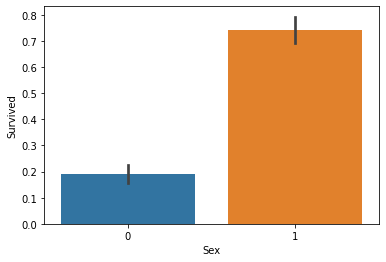

In [ ]:

#Dessin d'un bar plot des survivants selon leurs sexe
sns.barplot(x="Sex", y="Survived", data=train)

print("Percentage de femme ayant survécu:", train["Survived"][train["Sex"] == '1'].value_counts(normalize = True)[1]*100)

print("Percentage de homme ayant survécu:", train["Survived"][train["Sex"] == '0'].value_counts(normalize = True)[1]*100)

#### Puisqu'il n'y a pas de Nan sur la colonne Sex, je les numerise tout de suite:
    
    male ==> 0
    
    female ==> 1

In [ ]:
train['Sex']=train['Sex'].astype(str).map({'male':'0',"female":'1'})
train['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

Quel impact de la classe sur la chance de survie ?

Percentage de Pclass = 1 qui a survécu: 62.96296296296296
Percentage de Pclass = 2 qui a survécu: 47.28260869565217
Percentage de Pclass = 3 qui a survécu: 24.236252545824847


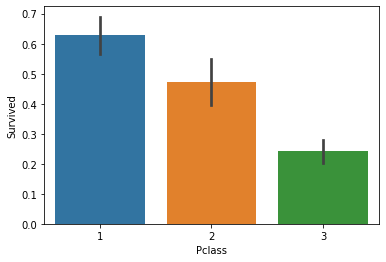

In [ ]:
# print("Pourcentage survivants paremiere classe :",train["Survived"][train["Pclass"] == '1'].value_counts(normalize = True)[1]*100))
# train["Survived"][train["Pclass"] == '2'].value_counts(normalize = True)[1]*100)
# train["Survived"][train["Pclass"] == '3'].value_counts(normalize = True)[1]*100)

#### Quel impact de l'age sur la chance de survie ?

In [ ]:
train['Age'].isna().sum()

177

Petit problème pour cette feature (Age). En effet, 177 observations (lignes) du dataset n'ont pas d'age renseigné.

#### J'aimerais recuperer les Nan(s) de la colonne Age (20%) j'ai l'impression que c'est important.

Je vais créer un model de regression permettant de trouver l'age d'un passager en fonction(SibSp,Sex,Parch,Fare) (cf kaggle data pour description des colonnes)

Comme je n'ai pas beaucoup de données pour réaliser cette tache, je ne respecterai pas les standards pour réaliser un modele de ML (pas d'echantillon de validation)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X=train[['Pclass','Sex','SibSp','Parch','Age','Fare']].dropna(subset=['Age'])
y=X['Age'].copy()
del X['Age']
reg = RandomForestRegressor(max_depth=14,n_estimators=50, random_state=0).fit(X, y)
reg.score(X, y)
scor = reg.score(X, y) * 100
print("score :",scor)

score : 67.82039084402729


Bon, c'est pas terrible comme accuracy 67,8% mais on va commencer comme cela 

==> Je sauve mon modèle (reg) en format pickle (.pkl)

In [ ]:
import pickle

# sauvegarder le modele
filename = '/age_titanic.sav'
pickle.dump(reg, open(filename,'wb'))
# charger le modele 
model = pickle.load(open('age_titanic.sav','rb'))

Je recupere l'index des lignes sans age et je les complete par la prediction de mon modele de prediction de l'age selon les colonnes ["Pclass",'Sex','SibSp','Parch','Fare']

In [ ]:
ind=train[train['Age'].isna()].index
train.loc[ind,"Age"]=reg.predict(train[train['Age'].isna()][["Pclass",'Sex','SibSp','Parch','Fare']])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,18.224733,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


#### Transformer un Age en label correspondant à un groupe social homogene :

['teen', 'young', 'Young adult', 'Adult junior', 'Adult senior', 'Adult', 'Senior']


Utiliser l'hyperparametre bins et label de la methode pd.cut() pour regrouper les ages par intervalles (dans un label) :

Mais avant tout, coupons notre serie en 7 groupes d'observations équilibrés avec pd.qcut


In [ ]:
pd.qcut(train['Age'], 7)

0      (17.589, 22.0]
1        (35.0, 44.0]
2      (22.0, 26.292]
3        (30.0, 35.0]
4        (30.0, 35.0]
            ...      
886    (26.292, 30.0]
887    (17.589, 22.0]
888    (17.589, 22.0]
889    (22.0, 26.292]
890      (30.0, 35.0]
Name: Age, Length: 891, dtype: category
Categories (7, interval[float64]): [(0.419, 17.589] < (17.589, 22.0] < (22.0, 26.292] < (26.292, 30.0] < (30.0, 35.0] < (35.0, 44.0] < (44.0, 80.0]]

Je reprend ce découpage par intervalle que je nomme labels=[]) et essayons d'observer si un label a plus de chance de survie que d'autres

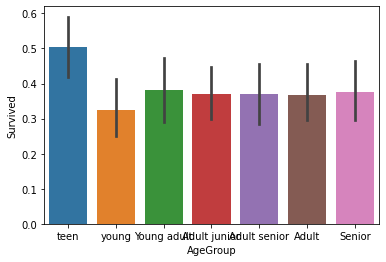

In [ ]:
#classer les ages dans catégories
train["Age"] = train["Age"]
test["Age"] = test["Age"]
bins = [0, 17, 22, 26, 30, 35, 44, np.inf]
labels = ['teen', 'young', 'Young adult', 'Adult junior', 'Adult senior', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Ok donc pas grand chose ... L'age semble totalement independant, mais difficile d'y croire

Cette fois ci, prenons ce découpage et observons, l'impact de celui ci sur les chances de survie

bins = [0, 6, 11, 18, 24, 35, 63, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

à vous de jouer

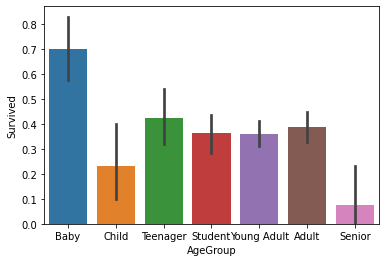

Ok, c'est mieux, il y a clairement des "profils à risque" ... Encore eux ... ;)

# Extraction de renseignement sur les autres colonnes du dataset

De maniere plus large, combien y a t il de Nans ?

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
dtype: int64
   


Donc on travaille sur Cabin, Embarked pour la gestion des Nan.

Et après, on verra pour extraire de l'info des colonnes Ticket et Name

Notre échantillon d'entrainement est petit, eliminer les Nan et donc la ligne entière reduirait encore plus la taille de notre jeu d'entrainement

Comment conserver l'information de la ligne (observation) malgré ces Nan

In [ ]:
train.sample(5)

NameError: ignored

Nous pouvons remplacer ces Nan par une valeur defaut ? Ou essayer de le remplacer par une valeur proche de son profil (qualifier par les autre variables)

## Colonne cabin

Il faut trouver un truc pour celle là, beaucou de Nan, mais ça doit avoir une importance

In [ ]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
D              3
              ..
B19            1
E49            1
A34            1
B86            1
C101           1
Name: Cabin, Length: 147, dtype: int64

On peut remarquer deux choses: Les lettres donne une information geographique, et il peut y avoir plusieurs cabines pour les "gentrifiées". 

Conservons ces deux infos :

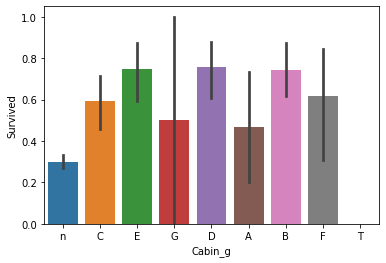

In [ ]:
# Extrayons la lettre de l'id de la cabine
train['Cabin_g']=train['Cabin'].apply(lambda x :str(x)[0])

sns.barplot(x="Cabin_g", y="Survived", data=train)
plt.show()

ok, c'est pas mal, on garde. Il fallait mieux etre au E,D,B pour trouver une issue au nauffrage

Faite de meme avec le nombre de cabine et extrayez ces informations dans un colonne "Cabin_n"

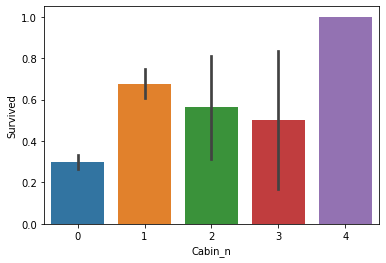

In [ ]:
# train['Cabin_n']=train['Cabin'].apply(lambda x: str(x).count(' ')+1)

In [ ]:
liste = train["Cabin"]
for cab in list :
  a = cab.find(" ")
  if a == 3 :
    count = 1
  else :
      count = int(a/3)
  train["Cabin_n"] = count    

NameError: ignored

Bon on va garder. Famille nombreuse en premier ?

Eliminer la colonne Cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Cabin_g,Cabin_n
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Student,n,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,Adult,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Young Adult,n,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,Young Adult,C,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,Young Adult,n,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,S,Young Adult,n,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S,Student,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,18.224733,1,2,W./C. 6607,23.4500,S,Student,n,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C,Young Adult,C,1


mapper les valeurs de la colonne Cabin_g avec le dictionnaire suivant (utilise la methode Series.map(dico)

{'E':8,'D':7,'B':6,'F':5,'C':4,'G':3,'A':2,'n':1,'T':0}

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Cabin_g,Cabin_n
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Student,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,Adult,4,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Young Adult,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,Young Adult,4,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,Young Adult,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,S,Young Adult,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S,Student,6,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,18.224733,1,2,W./C. 6607,23.4500,S,Student,1,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C,Young Adult,4,1


## Colonne embarked

In [ ]:
print("Nombre de passager ayant embarqué à Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Nombre de passager ayant embarqué à Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Nombre de passager ayant embarqué à Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)


Nombre de passager ayant embarqué à Southampton (S):
644
Nombre de passager ayant embarqué à Cherbourg (C):
168
Nombre de passager ayant embarqué à Queenstown (Q):
77


remplaçons les valeurs manquantes de cette colonne par X et representer la chance de survie par element unique de la colonne "embarked"

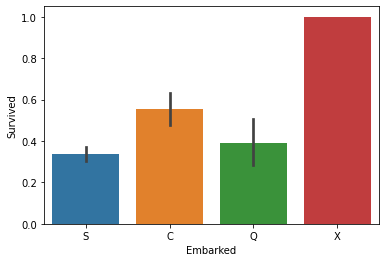

mapper les valeurs de la colonne embarked

{"S": 1, "Q": 2, "C": 3,"X":4}

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Cabin_g,Cabin_n
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1,Student,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,3,Adult,4,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,Young Adult,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,Young Adult,4,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1,Young Adult,1,0


## Colonne ticket 

Extrayons le partie numerique (en mettant à 0 les Nan de cette colonne) et voyons ce que l'on peut en tirer

In [ ]:
train['Ticket']=train['Ticket'].fillna('0').str.extract('([0-9]+)')
train['Ticket'].value_counts()

5         21
2         20
4          8
1601       7
347082     7
          ..
362316     1
17756      1
14311      1
2631       1
4134       1
Name: Ticket, Length: 635, dtype: int64

Trop de valeurs uniques, on peut retirer cette colonne. Allez y

## Colonne Name

Comment gérer le nom des personnes devons nous tout jeter ou peut etre conserver des informations, comme son titre (Mr / Miss / Lord / ... ). Ces informations ont certainement une influence avec le target que nous souhaitons prédire (A t il survecu ?)

Si nos passagers ont un titre, tres courant à l'epoque, celui ci est situé en en tete du nom.
Extrayons les (avec .str.extract() // regex de pandas) et verifions si cela est coherent

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_g,Cabin_n,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,1,Student,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,3,Adult,4,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,1,Young Adult,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,1,Young Adult,4,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,1,Young Adult,1,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,1,Young Adult,1,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,1,Student,6,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,18.224733,1,2,23.4500,1,Student,1,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,3,Young Adult,4,1,Mr


In [ ]:
pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


Ah c'était la belle époque, "les femmes et les enfants d'abord !"

In [ ]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


Y a t il beaucoup d'elements différents ?

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Sir           1
Mme           1
Ms            1
Countess      1
Don           1
Lady          1
Capt          1
Name: Title, dtype: int64

Remplaçons certains titres peu fréquents par un label commun :

.replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

.replace(['Countess', 'Lady', 'Sir'], 'Royal')

.replace('Mlle', 'Miss')

.replace('Ms', 'Miss')
  
.replace('Mme', 'Mrs')

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


Puis mapper chaque titre avec une valeur numérique

{"Mr": 1, "Miss": 4, "Mrs": 5, "Master": 3, "Royal": 6, "Rare": 2}

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_g,Cabin_n,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,Student,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,3,Adult,4,1,5
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,Young Adult,1,0,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,Young Adult,4,1,5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,Young Adult,1,0,1


#### Revenons sur notre colonne Age

Cette colonne avait initialement beaucoup de Nans que nous avons remplacé par les predictions d'un modele.

Nous pouvons créer un nouveau modele qui predit l'age des passagers (lorsqu'ils sont manquants) mais en utilisant le dataset que nous venons de transformer.

Mainenant, ré entrainons un modele de prediction d'Age manquant et estimeons l'age des passagers à partir de ces nouveaux renseignements.

à vous de jouer

0.7544460852357104

C'est encore mieux que tout à l'heure, prenons ce dernier model pour predire l'age (lorsqu'il n'etait pas renseigné) sur les observations 

nb: vous avez la variable ind, dans laquelle sont rangées les index de ces observations sans Age renseignees 

Allez y remplacer ces valeurs

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_g,Cabin_n,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,1,Student,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,3,Adult,4,1,5
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,1,Young Adult,1,0,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,1,Young Adult,4,1,5
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,1,Young Adult,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,1,Young Adult,1,0,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,1,Student,6,1,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,6.106551,1,2,23.4500,1,Student,1,0,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,3,Young Adult,4,1,1


In [ ]:
train['AgeGroup'].unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (7, object): ['Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

Mappons la colonne AgeGroup

{'Student':3, 'Adult':5, 'Young Adult':4, 'Baby':7, 'Teenager':6, 'Child':2, 'Senior':1}


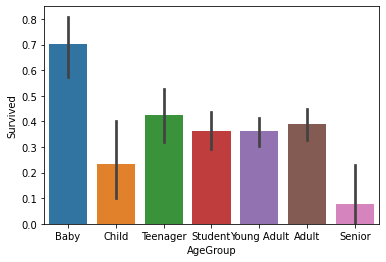

In [ ]:
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Conservons que les lignes sans Nan sur la colonne Fare

Eliminons la colonne "Name" avec .drop()

# Check des echantillons Train

In [ ]:
train.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_g,Cabin_n,Title
653,654,1,3,1,19.754619,0,0,7.8292,2,3,1,0,4
337,338,1,1,1,41.000000,0,0,134.5000,3,5,8,1,4
874,875,1,2,1,28.000000,1,0,24.0000,3,4,1,0,5


# Décomposition de l'echantillon train en sous train et sous test

Survived est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

In [ ]:
train.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Cabin_g,Cabin_n,Title
110,111,0,1,0,47.000000,0,0,52.0000,1,5,4,1,1
64,65,0,1,0,37.779405,0,0,27.7208,3,5,1,0,1
725,726,0,3,0,20.000000,0,0,8.6625,1,3,1,0,1


Nous l'appellerons target 

In [ ]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId',"Fare"], axis=1)
target = train["Survived"]


Nous gardons 20 %  de notre echantillon train qui est labelisé pour evaluer la performance de notre modele 

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

# Modélisation / Prédiction


#### STOP : Veille sur les modeles :

- RandomForest
- Naives Bayes
- LogisticRegression,

#### Piocher dans la librairie sklearn des modeles de classification (RandomForest, Naives Bayes, LogisticRegression) et realiser plusieurs modeles. 





In [ ]:
# Naives Bayes
from sklearn.naive_bayes import MultinomialNB,ComplementNB



83.24


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


83.8


In [ ]:
from sklearn.linear_model import LogisticRegression


82.12


#### Petit retour sur l'evaluation d'un modele de classification

Pour evaluer, plus en detail la précision du modele, utilisons une matrice de confusion.
Elle permet de visualiser rapidement le nombre d'éléments mal predits


Vous obtiendrez en colonne les valeurs réelles (0 , 1). Et en ligne, les valeurs predites (0 , 1). Maximiser les éléments sur la digonale est notre objectif (bon match prediction reel)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, clf.predict(x_val))

En classification binaire, nous pouvons definir chacune des cases de ce tableau

![title](https://miro.medium.com/max/1890/1*OhEnS-T54Cz0YSTl_c3Dwg.jpeg)


    nb: Attention sur ce sch"ma les colonne et lignes sont inversées vs sklearn

Nous définissons deux indicateurs principaux pour évaluer un classifier

![title](https://miro.medium.com/max/1199/1*7J08ekAwupLBegeUI8muHA.png)

Et enfin le F1 score qui synthetise sa performance

![title](https://miro.medium.com/max/761/1*T6kVUKxG_Z4V5Fm1UXhEIw.png)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, clf.predict(x_val))

# Creation d'un fichier de soumission Kaggle

#### Transformons egalement notre test !

Pour comparer notre predicteur avec la communauté kaggle, nos devons renvoyer le dataframe test.csv documenté des predictions de survie.

Notre modele etant calé sur un nombre et un typage de colonne precis (celui qui lui a permis de s'entrainer),

Nous devons donc transformer notre dataframe test de la meme façon que nous avons fait pour le train.


==> Regrouper les sequences de transformation par thématiques communes et encapsulez les dans des fonctions.

==> Transformer le fichier test jusqu'a obtenir un fichier totalemnt numérisé (de la meme facon que le train) pour notre modele.

==> Réaliser un model.predict(test) (cf ci dessous)

In [ ]:
#Le fichier de soumission contione un colonne passenger ID et une colonne survie ou non
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

#Construction sous format csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

#### Soumettez votre résultat sur https://www.kaggle.com/c/titanic ==> Submit Predictions

### Pour les Devs

Construisez une classe trans heritant de la classe DataFrame et implementer les fonctions de nettoyage/mise_en_forme comme méthodes de ce nouvel objet 